### 0. Import Libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### 1. Data Overview

In [44]:
df = pd.read_csv("WSN-DS.csv")

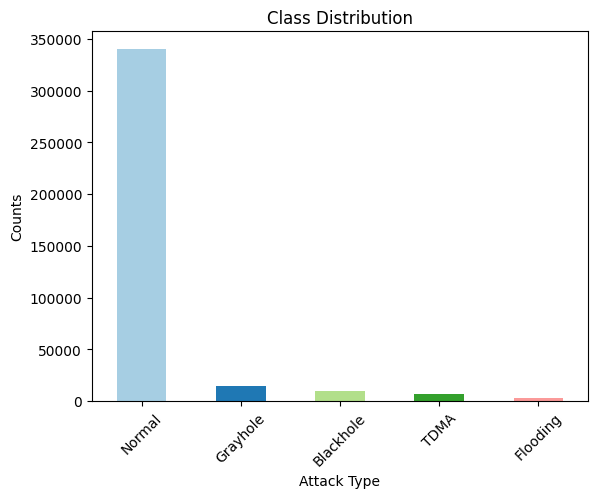

In [49]:
attack_type_counts = df['Attack type'].value_counts()
attack_type_counts.plot(kind='bar', color=plt.cm.Paired(range(len(attack_type_counts))))
plt.title('Class Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

### 2. Balance class distribution

#### 2.1 SMOTE

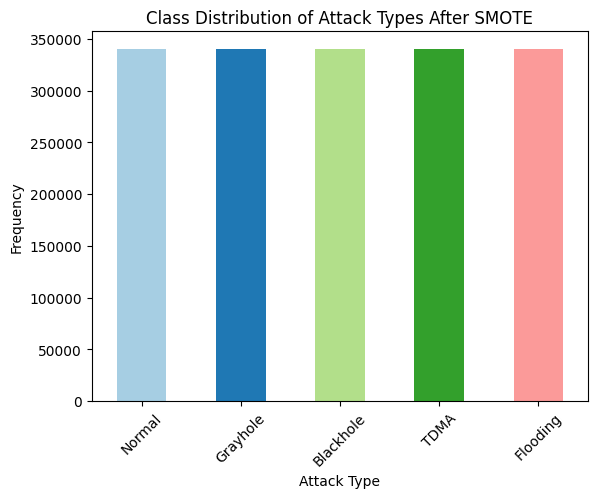

In [54]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X = df.drop('Attack type', axis=1)
Y = df['Attack type']
X_SMOTE, Y_SMOTE = smote.fit_resample(X, Y)
order = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']
attack_type_counts = Y_SMOTE.value_counts().reindex(order)
attack_type_counts.plot(kind='bar', color=plt.cm.Paired(range(len(attack_type_counts))))
plt.title('Class Distribution of Attack Types After SMOTE')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### 2.2 resample

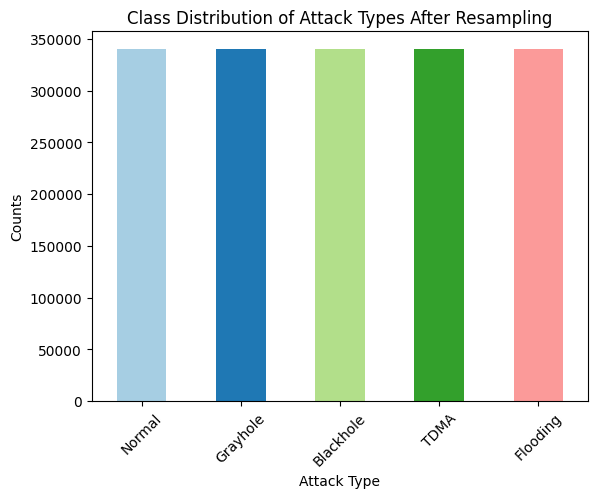

In [57]:
from sklearn.utils import resample
df_normal = df[df['Attack type'] == 'Normal']
df_grayhole = df[df['Attack type'] == 'Grayhole']
df_blackhole = df[df['Attack type'] == 'Blackhole']
df_tdma = df[df['Attack type'] == 'TDMA']
df_flooding = df[df['Attack type'] == 'Flooding']
df_grayhole_resampled = resample(df_grayhole, replace=True, n_samples=len(df_normal), random_state=42)
df_blackhole_resampled = resample(df_blackhole, replace=True, n_samples=len(df_normal), random_state=42)
df_tdma_resampled = resample(df_tdma, replace=True, n_samples=len(df_normal), random_state=42)
df_flooding_resampled = resample(df_flooding, replace=True, n_samples=len(df_normal), random_state=42)
df_balanced = pd.concat([df_normal, 
                         df_grayhole_resampled, 
                         df_blackhole_resampled, 
                         df_tdma_resampled, 
                         df_flooding_resampled])
order = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']
attack_type_counts = df_balanced['Attack type'].value_counts().reindex(order)
attack_type_counts.plot(kind='bar', color=plt.cm.Paired(range(len(attack_type_counts))))
plt.title('Class Distribution of Attack Types After Resampling')
plt.xlabel('Attack Type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

### 3. Train and Test

In [41]:
from sklearn.linear_model import LogisticRegression
X = df_balanced.drop(columns=['Attack type'])
y = df_balanced['Attack type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8992283850781907

Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.71      1.00      0.83     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       0.95      0.59      0.73     68132
      Normal       0.94      0.97      0.95     67695
        TDMA       0.99      0.93      0.96     68415

    accuracy                           0.90    340066
   macro avg       0.92      0.90      0.90    340066
weighted avg       0.92      0.90      0.90    340066


Confusion Matrix:
 [[67809     0    95     0     7]
 [    0 67817    51    45     0]
 [27006     0 40517    19   590]
 [    0    83  1577 65881   154]
 [   28     0   278  4336 63773]]


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9994471661383378

Classification Report:
               precision    recall  f1-score   support

   Blackhole       1.00      1.00      1.00     67911
    Flooding       1.00      1.00      1.00     67913
    Grayhole       1.00      1.00      1.00     68132
      Normal       1.00      1.00      1.00     67695
        TDMA       1.00      1.00      1.00     68415

    accuracy                           1.00    340066
   macro avg       1.00      1.00      1.00    340066
weighted avg       1.00      1.00      1.00    340066


Confusion Matrix:
 [[67911     0     0     0     0]
 [    0 67913     0     0     0]
 [    0     0 68132     0     0]
 [    0    27    46 67507   115]
 [    0     0     0     0 68415]]
